In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
loaded_model = tf.keras.models.load_model('number_cnn1.keras')

In [4]:
def predict_image(image):
    prediction = loaded_model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the index of the predicted class
    return predicted_class

In [6]:
from PIL import Image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert("L")
    #image = image.convert("RGB")
    image = image.rotate(-90) #some pictures may rotate 90 deg when viewed, some don't. use this to makethe processed image right side up.
    threshold = 130  # Adjust this threshold value as needed, higher threshold is less filtered out.
    image = image.point(lambda p: p > threshold and 255)
    image = image.resize((28, 28))  # Resize image to match model input size
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image = 1-np.array(image)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [7]:
image_path = "IMG_2504.jpg"
# Preprocess the image
preprocessed_image = preprocess_image(image_path)
# Perform prediction
print(preprocessed_image.shape)
predicted_class = predict_image(preprocessed_image)
# Print the predicted class
print("Predicted class:", predicted_class)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
Predicted class: 5


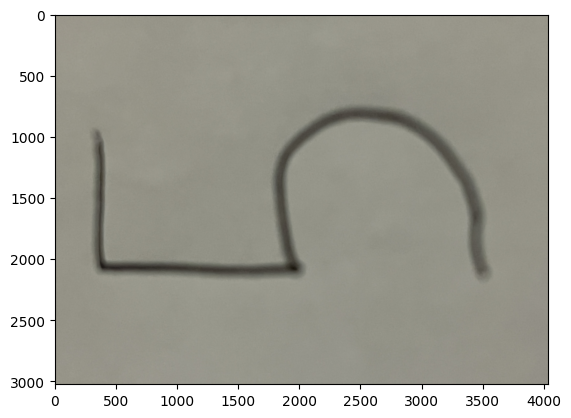

In [11]:
image = Image.open(image_path)
plt.imshow(image)

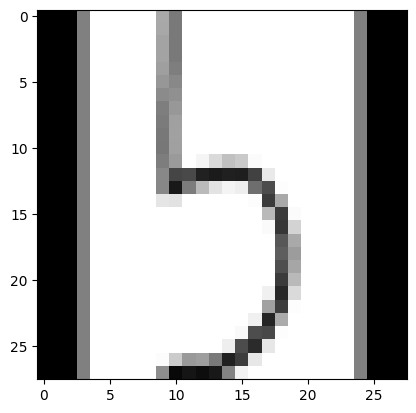

In [12]:
plt.imshow(preprocessed_image.reshape((28, 28)), cmap=plt.cm.binary)